In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [5]:
#Load and Inspect Data

#Load the dataset
df=pd.read_csv('weather_data.csv')

#Quick checks
print(df.head())
print(df.info())
print(df.describe())

#Check missing values and duplicates
print(df.isnull().sum())
print("Duplicates:",df.duplicated().sum())



         Date  Temperature  Humidity  WindSpeed  Rainfall
0  2024-01-01         29.5        74       17.3       5.0
1  2024-01-02         27.6        55       13.3       3.5
2  2024-01-03         29.9        72       12.9       0.0
3  2024-01-04         32.6        69        8.6       0.0
4  2024-01-05         27.3        83        6.4       0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         90 non-null     object 
 1   Temperature  90 non-null     float64
 2   Humidity     90 non-null     int64  
 3   WindSpeed    90 non-null     float64
 4   Rainfall     90 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.6+ KB
None
       Temperature   Humidity  WindSpeed   Rainfall
count    90.000000  90.000000  90.000000  90.000000
mean     27.701111  66.433333  13.282222   2.377778
std       2.806433  13.270776   4

In [7]:
#Data cleaning

#Convert 'Date' to datetime format 
df['Date']=pd.to_datetime(df['Date'])

#Handling missing values
df.fillna(df.mean(), inplace=True)

#Remove Duplicates
df=df.drop_duplicates()

#Check for negative rainfall or invalid values
df=df[df['Rainfall'] >=0]

#save cleaned data
df.to_csv('weather_data_clean.csv', index=False)

In [17]:
#Basic Exploratory Data Analysis(EDA)

#Summary Statistics
print(df.describe())

#Hottest and coldest days
hottest=df.loc[df['Temperature'].idxmax()]
coldest=df.loc[df['Temperature'].idxmin()]
print(f'Hottest Day:{hottest}')
print(f'Coldest Day:{coldest}')

#Monthly Averages
monthly_avg=df.set_index('Date').resample('M').mean(numeric_only=True)
print(monthly_avg)


                      Date  Temperature   Humidity  WindSpeed   Rainfall
count                   90    90.000000  90.000000  90.000000  90.000000
mean   2024-02-14 12:00:00    27.701111  66.433333  13.282222   2.377778
min    2024-01-01 00:00:00    20.100000  45.000000   5.100000   0.000000
25%    2024-01-23 06:00:00    26.200000  55.000000   9.500000   0.000000
50%    2024-02-14 12:00:00    27.650000  68.000000  13.900000   0.500000
75%    2024-03-07 18:00:00    29.500000  77.000000  17.175000   5.000000
max    2024-03-30 00:00:00    33.600000  88.000000  19.900000   7.200000
std                    NaN     2.806433  13.270776   4.371578   2.703630
Hottest Day:Date           2024-02-01 00:00:00
Temperature                   33.6
Humidity                        61
WindSpeed                     16.2
Rainfall                       0.5
Name: 31, dtype: object
Coldest Day:Date           2024-03-15 00:00:00
Temperature                   20.1
Humidity                        77
WindSpeed      

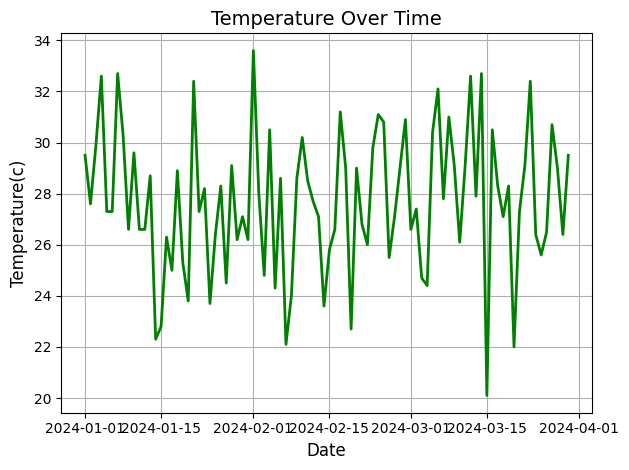

In [8]:
#Data Visulization

#create the floder named 'plots' to save images
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Line plot -Temperature over time
plt.plot(df['Date'],df['Temperature'],color='g', linewidth=2)
plt.title("Temperature Over Time",fontsize=14 )
plt.xlabel('Date',fontsize=12)
plt.ylabel('Temperature(c)',fontsize=12)
plt.grid(True)
plt.tight_layout()

#save and show the plot
plt.savefig("plots/temperature_over_time.png")
plt.show()


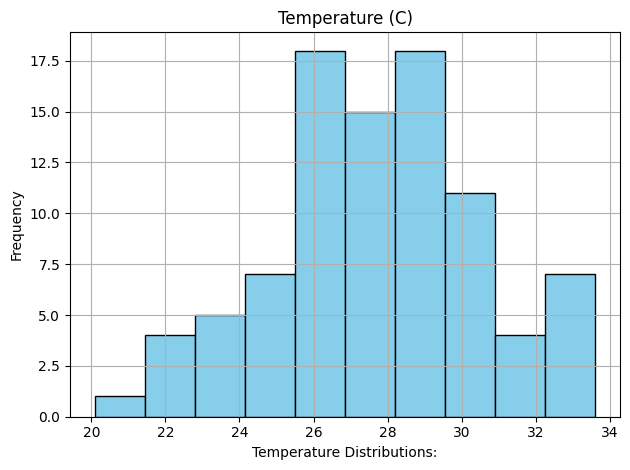

In [9]:
#Histogram -Temperature Distributions
import matplotlib.pyplot as plt
plt.hist(df['Temperature'],color="Skyblue",edgecolor='black')
plt.title('Temperature (C)')
plt.xlabel('Temperature Distributions:')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

#save and show the plot
plt.savefig("plots/temp_hist.png")
plt.show()


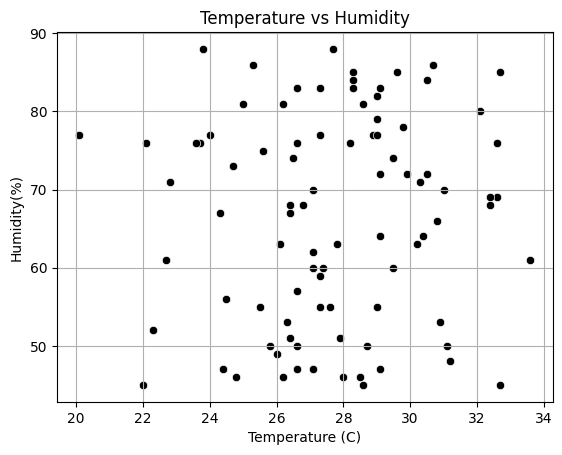

In [10]:
#Scatter plot- Temperature and Humidity
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df,x='Temperature', y='Humidity', color='black')
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity(%)')
plt.grid(True)

#save and show the plot
plt.savefig("plots/temp_vs_humidity")
plt.show()




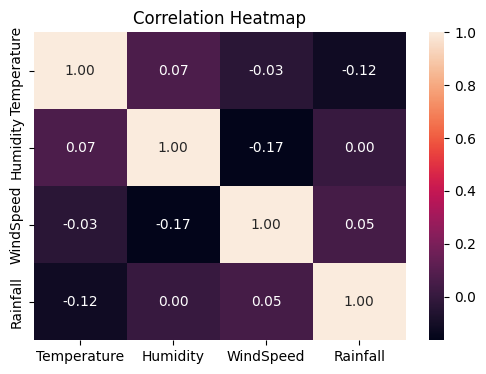

In [14]:


#Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

#Select the columns for correlations
plt.figure(figsize=(6,4))
sns.heatmap(df[['Temperature','Humidity','WindSpeed','Rainfall']].corr(),annot=True, fmt='.2f')
plt.title("Correlation Heatmap")

#save and show the plot
plt.savefig("plots/corr_heatmap.png", bbox_inches="tight")
plt.show()
